<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m3_%EB%B6%84%EC%84%9D%20%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/Task/Task_5030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Task1_0530. 고객 정보 데이터프레임과 구매 내역 데이터프레임을 결합하여 각 고객이름(name) 별 총 지출을 계산하여 출력하세요.
import pandas as pd

# 고객 정보 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

# 구매 내역 데이터프레임 생성
purchases = pd.DataFrame({
    'purchase_id': [101, 102, 103, 104, 105],
    'customer_id': [1, 2, 1, 3, 2],
    'amount': [250, 150, 200, 300, 350]
})
# print(customers,'\n')
# print(purchases,"\n")

# # Option-1 using MERGE
# MergedDF=pd.merge(customers,purchases, on='customer_id', how='left')      # inner 사용가능
# PVM=MergedDF.pivot_table(index='name', values='amount', aggfunc='sum', fill_value=0)
# print(PVM,"\n")

# # Option-2 using JOIN
# JoinedDF = purchases.set_index('customer_id').join(customers.set_index('customer_id'), how='outer')
# PVJ=JoinedDF.pivot_table(index='name', values='amount', aggfunc='sum', fill_value=0)
# print(PVJ,"\n")

# # Option-3 using CONCAT
# ConDF = pd.concat([customers, purchases], axis=1)
# PVC=JoinedDF.pivot_table(index='name', values='amount', aggfunc='sum', fill_value=0)
# print(PVC,"\n")

# Option-4
# 두 데이터 프레임 결합(내부 조인) using MERGE
MergedDF=pd.merge(customers,purchases, on='customer_id', how='inner')      # inner 사용가능
# print(MergedDF, '\n')
# 고객별 총 지출 계산
total_spent = PVM=MergedDF.groupby('name')['amount'].sum().reset_index()
print(total_spent,"\n")

   customer_id     name  purchase_id  amount
0            1    Alice          101     250
1            1    Alice          103     200
2            2      Bob          102     150
3            2      Bob          105     350
4            3  Charlie          104     300 

      name  amount
0    Alice     450
1      Bob     500
2  Charlie     300 



In [13]:
# Task2_0530. 학생 성적 데이터프레임과 과목 데이터프레임을 결합하여 각 과목별 평균 성적을 계산하여 출력하세요.
# 학생 성적 데이터프레임 생성
grades = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 1, 2, 3, 4],
    'subject_id': [101, 101, 102, 102, 103, 103, 101, 103],
    'grade': [85, 90, 78, 88, 92, 95, 80, 85]
})

# 과목 데이터프레임 생성
subjects = pd.DataFrame({
    'subject_id': [101, 102, 103],
    'subject_name': ['Math', 'Science', 'History']
})
# print(grades,'\n')
# print(subjects,'\n')


# # Option-1 using MERGE
# MergedDF=pd.merge(grades,subjects, on='subject_id', how='left')
# PVM=MergedDF.pivot_table(index='student_id', columns='subject_name',values='grade', aggfunc='mean', fill_value=0)
# print(PVM,"\n")

# # Option-2 using JOIN
# JoinedDF = grades.set_index('subject_id').join(subjects.set_index('subject_id'), how='left')
# PVJ=JoinedDF.pivot_table(index='student_id', columns='subject_name', values='subject_name', aggfunc='mean', fill_value=0)
# print(PVJ,"\n")

# # Option-3 using CONCAT
# ConDF = pd.concat([grades, subjects], axis=1)
# PVC=JoinedDF.pivot_table(index='student_id', columns='subject_name', values='subject_name', aggfunc='mean', fill_value=0)
# print(PVC,"\n")

# Option-4 using MERGE
# 두 데이터 프레임 결합( 내부조인)
MergedDF=pd.merge(grades, subjects, on='subject_id', how='inner')
avg_grade = MergedDF.groupby('subject_name')['grade'].mean().reset_index()
print(avg_grade,"\n")

  subject_name      grade
0      History  90.666667
1         Math  85.000000
2      Science  83.000000 



In [16]:
# Task3_0530. 고객 데이터프레임에서 age가 30 이상이고 spending이 500 이상인 고객을 찾아 출력하세요.
import pandas as pd

# 예제 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 35, 30, 40, 28],
    'spending': [300, 600, 500, 700, 400]
})
print(customers,"\n")
C_F=customers[(customers['spending'] >= 500) & (customers['age']>= 30)]
C_F

   customer_id     name  age  spending
0            1    Alice   25       300
1            2      Bob   35       600
2            3  Charlie   30       500
3            4    David   40       700
4            5      Eve   28       400 



,customer_id,name,age,spending
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700


In [17]:
con1 = customers['age'] >= 30
con2 = customers['spending'] >= 500
filered_customers = customers[con1 & con2]
print(filered_customers)

   customer_id     name  age  spending
1            2      Bob   35       600
2            3  Charlie   30       500
3            4    David   40       700


In [19]:
# Task4_0530. 학생 성적 데이터프레임에서 math_score가 80 이상 90 이하인 학생을 찾아 출력하세요.
import pandas as pd

# 예제 데이터프레임 생성
students = pd.DataFrame({
    'student_id': [101, 102, 103, 104, 105],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'math_score': [75, 85, 88, 92, 78],
    'english_score': [80, 78, 82, 88, 90]
})
print(students,"\n")

S_F=students[(students['math_score'] > 80) & (students['math_score'] <= 90)]
S_F

   student_id     name  math_score  english_score
0         101    Alice          75             80
1         102      Bob          85             78
2         103  Charlie          88             82
3         104    David          92             88
4         105      Eve          78             90 



,student_id,name,math_score,english_score
1,102,Bob,85,78
2,103,Charlie,88,82


In [21]:
c1 = students['math_score'] >= 80
c2 = students['math_score'] <= 90
filered_students = students[c1 & c2]
print(filered_students)

   student_id     name  math_score  english_score
1         102      Bob          85             78
2         103  Charlie          88             82


In [24]:
from google.colab import files
# 파일 업로드
uploaded = files.upload()

Saving titanic3.csv to titanic3.csv


In [27]:
# Task5_0530. 주어진 titanic3 데이터셋에서 survived 열을 사용하여 생존자와 비생존자의 수를 계산하여 출력하세요.
import pandas as pd

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)
print(df, '\n')

# 생존자와 비생존자 수 계산
survival_counts = df['survived'].value_counts()
Nom_Null=df.survived.isnull().sum()
# 결과 출력
print(survival_counts)
print(Nom_Null)

      pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex    age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00  

In [28]:
# Task6_0530. 주어진 titanic3 데이터셋에서 pclass 열을 기준으로 각 객실 등급의 평균 운임(fare)을 계산하여 출력하세요.
print(df.columns)
df[['pclass', 'fare']]
PVT=df.pivot_table(index='pclass', values='fare', aggfunc='mean')
PVT

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


,fare
pclass,
1,87.508992
2,21.179196
3,13.302889


In [29]:
average_fare_by_class = df.groupby('pclass')['fare'].mean()
print(average_fare_by_class)

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64


In [ ]:
#################################### Titanic3 DATA
print(df.columns)
df.info()
df.head(20)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


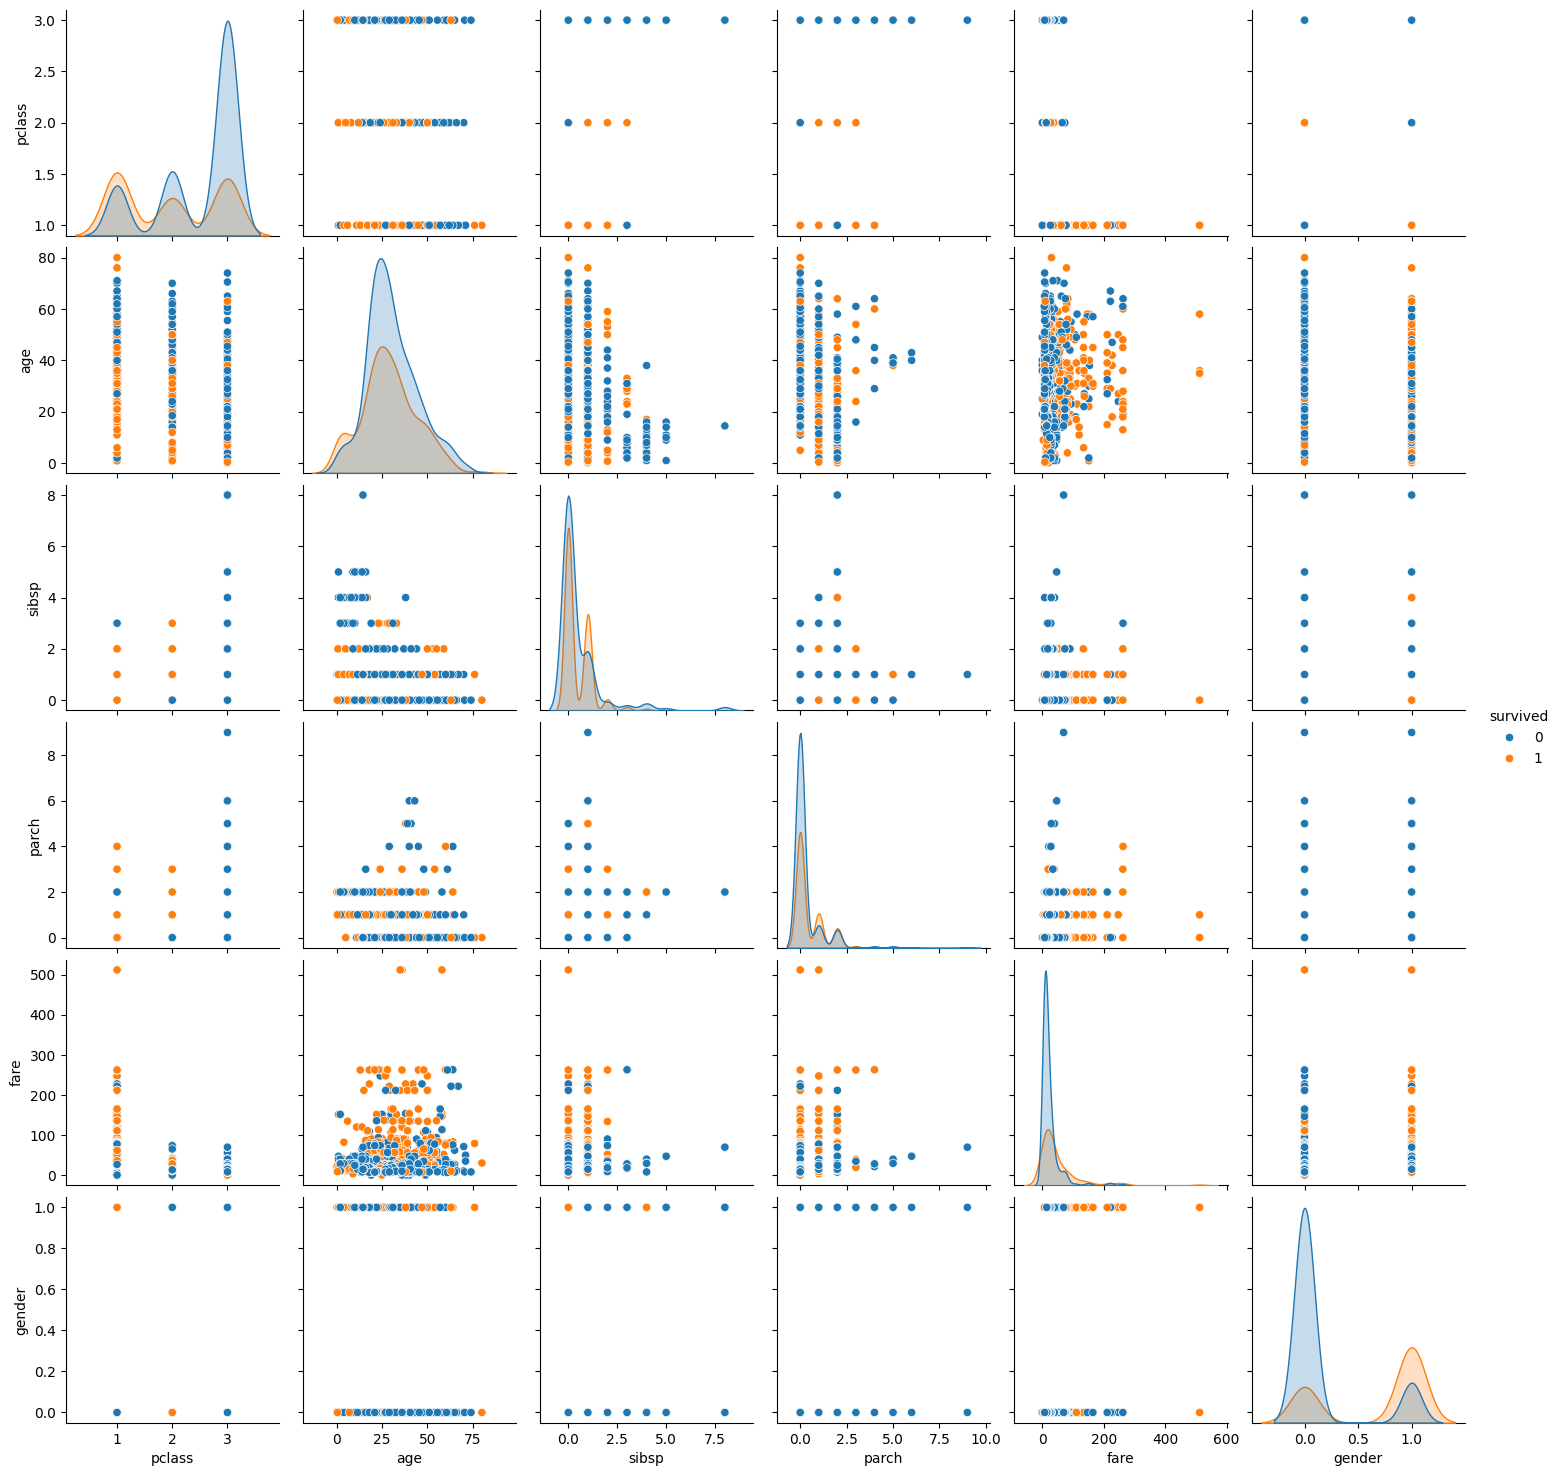

In [32]:
# Task7_0530. titanic3 각 변수의 상관계수를 통해 각 변수와 목표 변수(생존 여부) 간의 관계를 파악하세요.
# 상관계수는 숫자만 계산 할 수 있다.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

# sex column을 gender로 변경
df.rename(columns={'sex': 'gender'}, inplace=True)

# gender를 수치화 (female: 1, male: 0)
df['gender'] = df['gender'].map({'female': 1, 'male': 0})

# 결측치 처리 (일단은 간단히 평균값으로 대체)
#df.fillna(df.mean(), inplace=True)

# 시각화
sns.pairplot(df[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender', 'survived']], hue='survived')
plt.show()

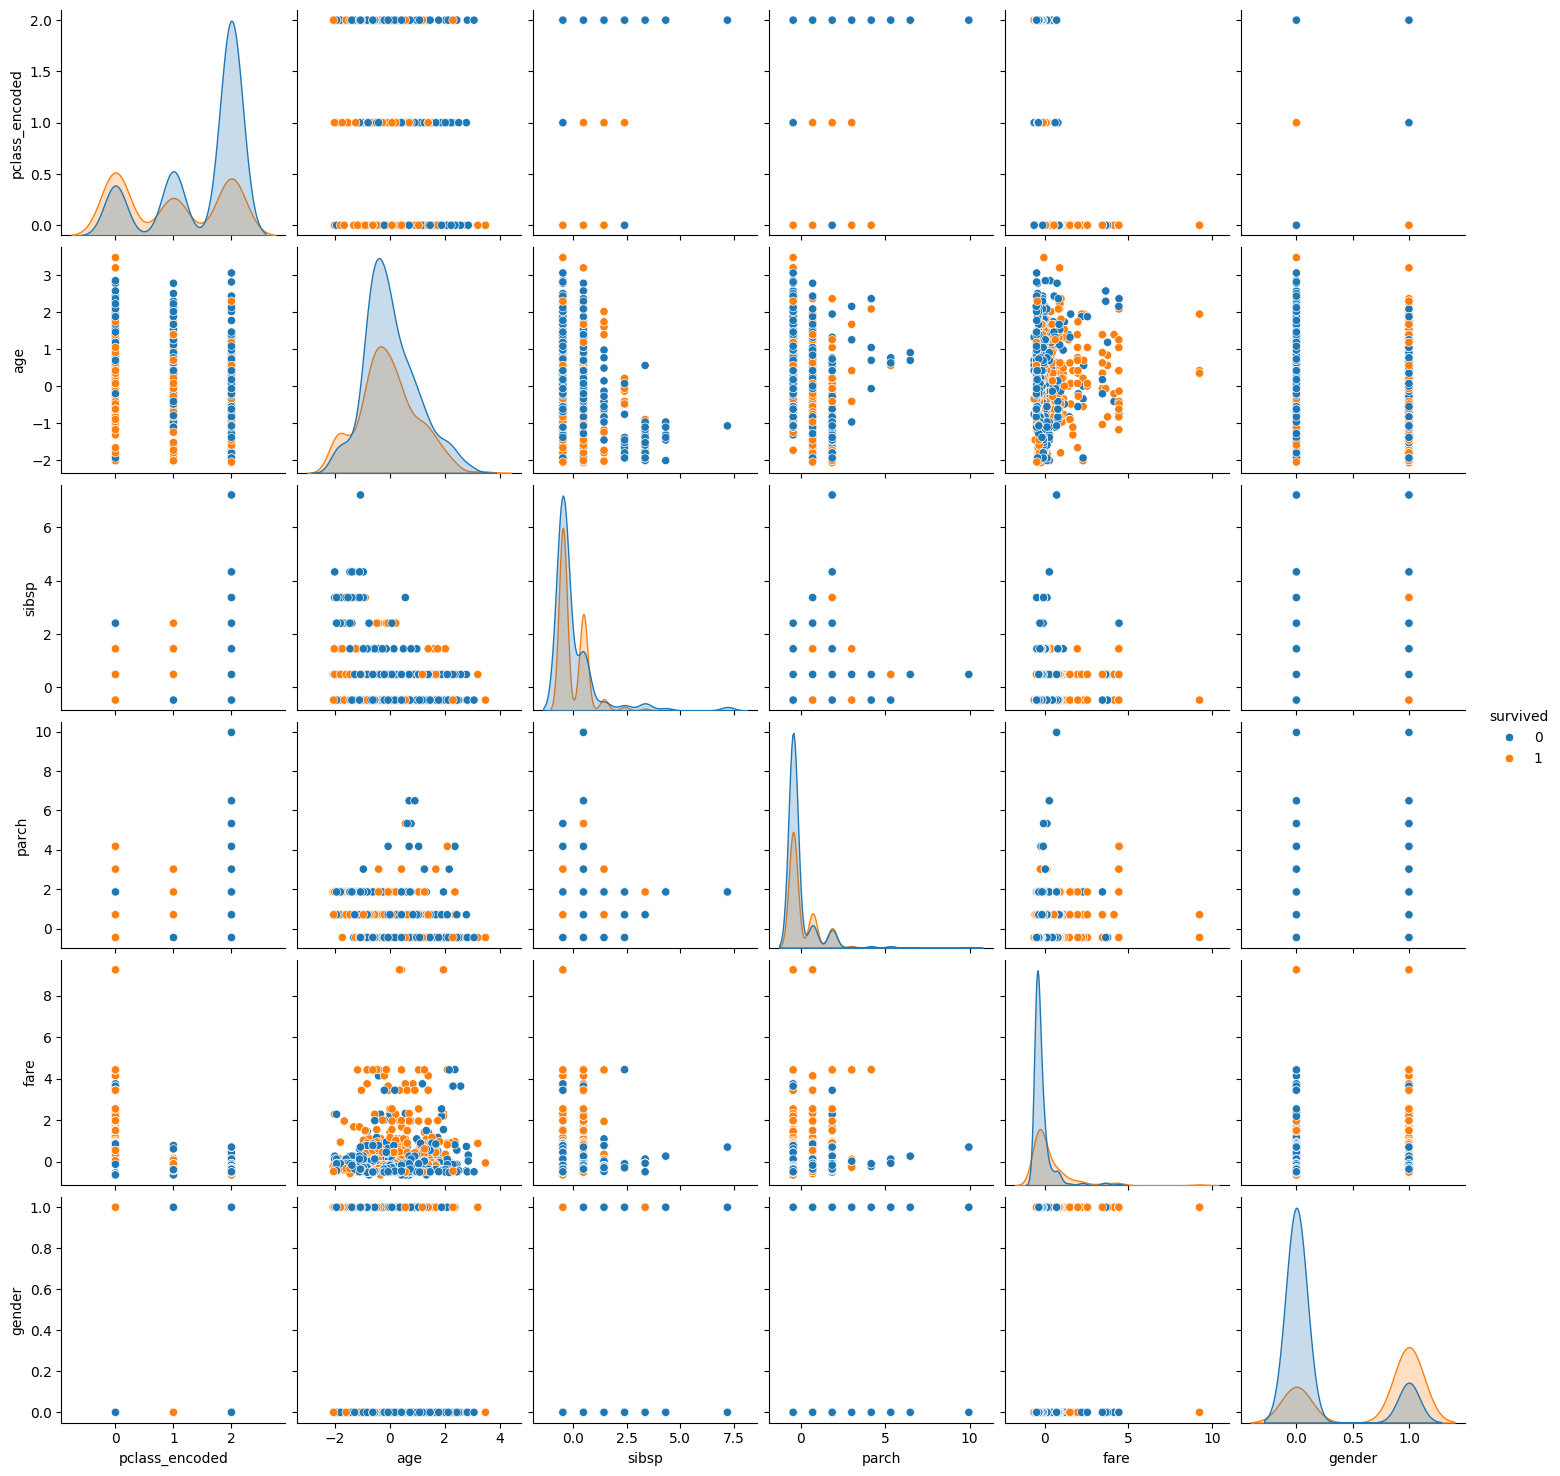

In [33]:
# Encoding
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

# sex column을 gender로 변경
df.rename(columns={'sex': 'gender'}, inplace=True)

# gender를 수치화 (female: 1, male: 0)
df['gender'] = df['gender'].map({'female': 1, 'male': 0})

# 결측치 처리 (일단은 간단히 평균값으로 대체)
#df.fillna(df.mean(), inplace=True)

# LabelEncoder 사용하여 pclass 인코딩
label_encoder = LabelEncoder()
df['pclass_encoded'] = label_encoder.fit_transform(df['pclass'])

# pclass 원핫인코딩
df = pd.get_dummies(df, columns=['pclass'], prefix='pclass')

# Age, sibsp, parch, fare의 표준화
scaler = StandardScaler()
df[['age', 'sibsp', 'parch', 'fare']] = scaler.fit_transform(df[['age', 'sibsp', 'parch', 'fare']])

# 시각화
sns.pairplot(df[['pclass_encoded', 'age', 'sibsp', 'parch', 'fare', 'gender', 'survived']], hue='survived')
plt.show()

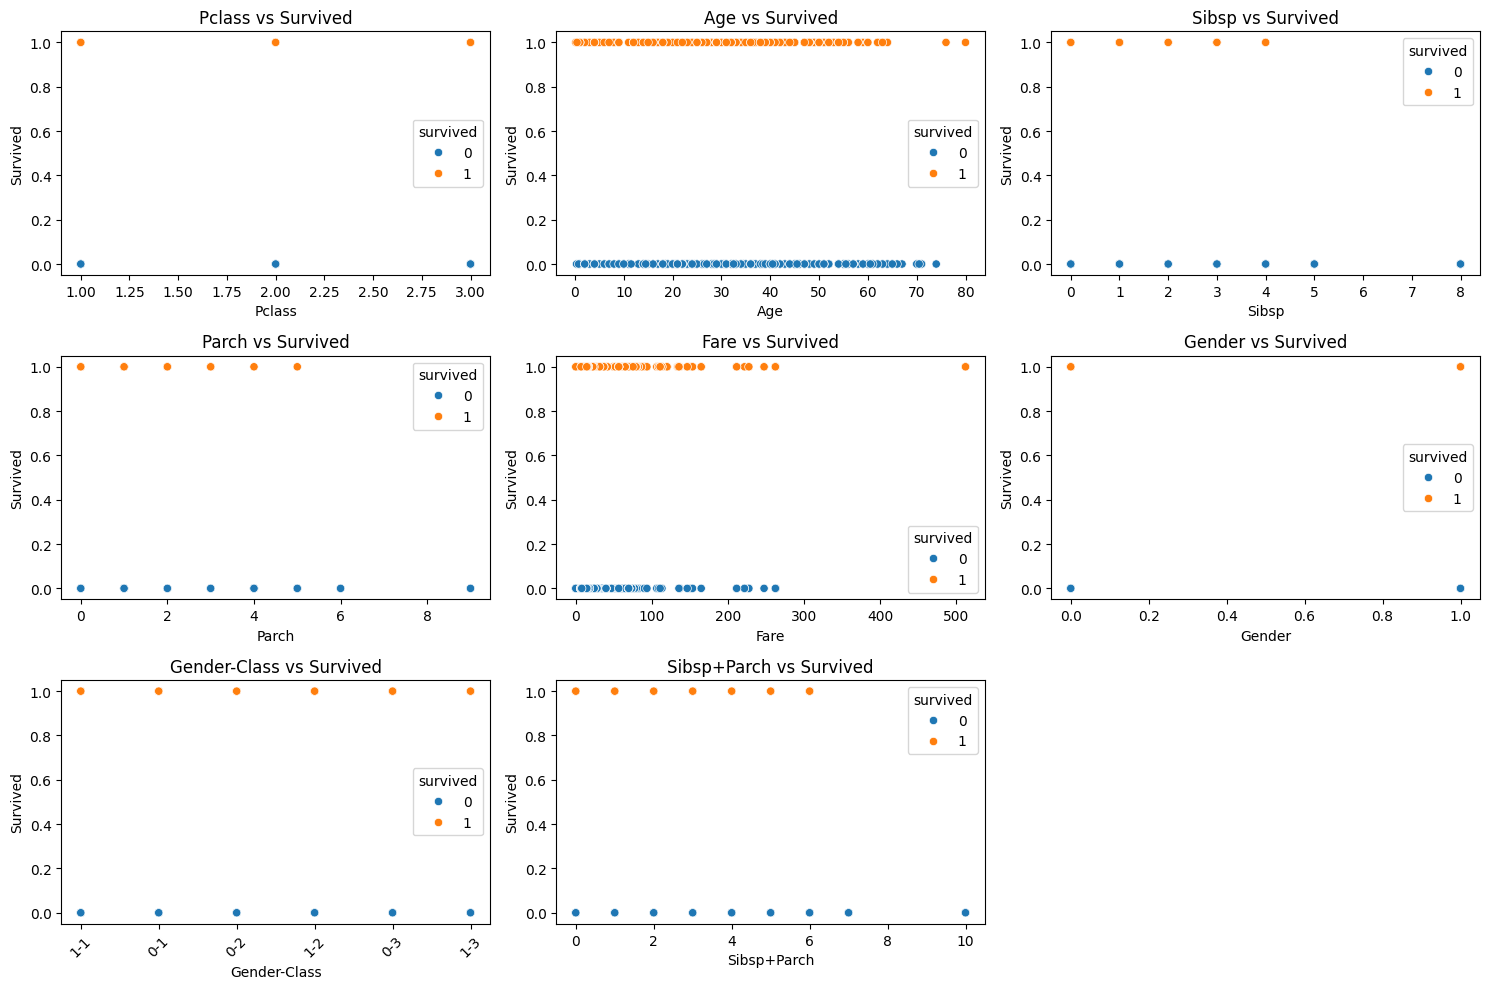

상관관계:
gender    0.528693
fare      0.244265
parch     0.082660
sibsp    -0.027825
age      -0.055512
pclass   -0.312469
Name: survived, dtype: float64


In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

# sex column을 gender로 변경
df.rename(columns={'sex': 'gender'}, inplace=True)

# gender를 수치화 (female: 1, male: 0)
df['gender'] = df['gender'].map({'female': 1, 'male': 0})

# 결측치 처리 (일단은 간단히 평균값으로 대체)
#df.fillna(df.mean(), inplace=True)

# 상관관계를 볼 컬럼 선택
selected_columns = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender', 'survived']
df = df[selected_columns]

# 상관관계 계산
correlations = df.corr()['survived'].drop(['survived']).sort_values(ascending=False)

# gender와 pclass 조합 열 추가
df['gender_class'] = df['gender'].astype(str) + '-' + df['pclass'].astype(str)

# Scatter plot 그리기
plt.figure(figsize=(15, 10))

# 선택한 열과 survived 간의 상관관계 시각화
for i, col in enumerate(selected_columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(data=df, x=col, y='survived', hue='survived')
    plt.title(f'{col.capitalize()} vs Survived')
    plt.xlabel(col.capitalize())
    plt.ylabel('Survived')

# gender_class 별 survived와의 상관관계 시각화
plt.subplot(3, 3, 7)
sns.scatterplot(data=df, x='gender_class', y='survived', hue='survived')
plt.title('Gender-Class vs Survived')
plt.xlabel('Gender-Class')
plt.ylabel('Survived')
plt.xticks(rotation=45)

# sibsp와 parch 합친 열 생성
df['sibsp_parch'] = df['sibsp'] + df['parch']

# sibsp_parch와 survived의 상관관계 시각화
plt.subplot(3, 3, 8)
sns.scatterplot(data=df, x='sibsp_parch', y='survived', hue='survived')
plt.title('Sibsp+Parch vs Survived')
plt.xlabel('Sibsp+Parch')
plt.ylabel('Survived')


plt.tight_layout()
plt.show()

print("상관관계:")
print(correlations)


상관관계:
gender         0.528693
평균요금by클래스      0.291875
fare           0.244265
parch          0.082660
sibsp_parch    0.026876
sibsp         -0.027825
age           -0.055512
pclass        -0.312469
Name: survived, dtype: float64 

PV1
              survived
sibsp_parch          
0            0.302532
1            0.536170
2            0.566038
3            0.697674
4            0.272727
5            0.200000
6            0.250000
7            0.000000
10           0.000000 

PV2
               survived
gender_class          
0-1           0.340782
0-2           0.146199
0-3           0.152130
1-1           0.965278
1-2           0.886792
1-3           0.490741 

PV3
         survived
pclass          
1       0.619195
2       0.429603
3       0.255289 

PV4
           survived
fare              
0.0000    0.117647
3.1708    1.000000
4.0125    0.000000
5.0000    0.000000
6.2375    0.000000
...            ...
227.5250  0.600000
247.5208  0.666667
262.3750  0.857143
263.0000  0.666667
512.

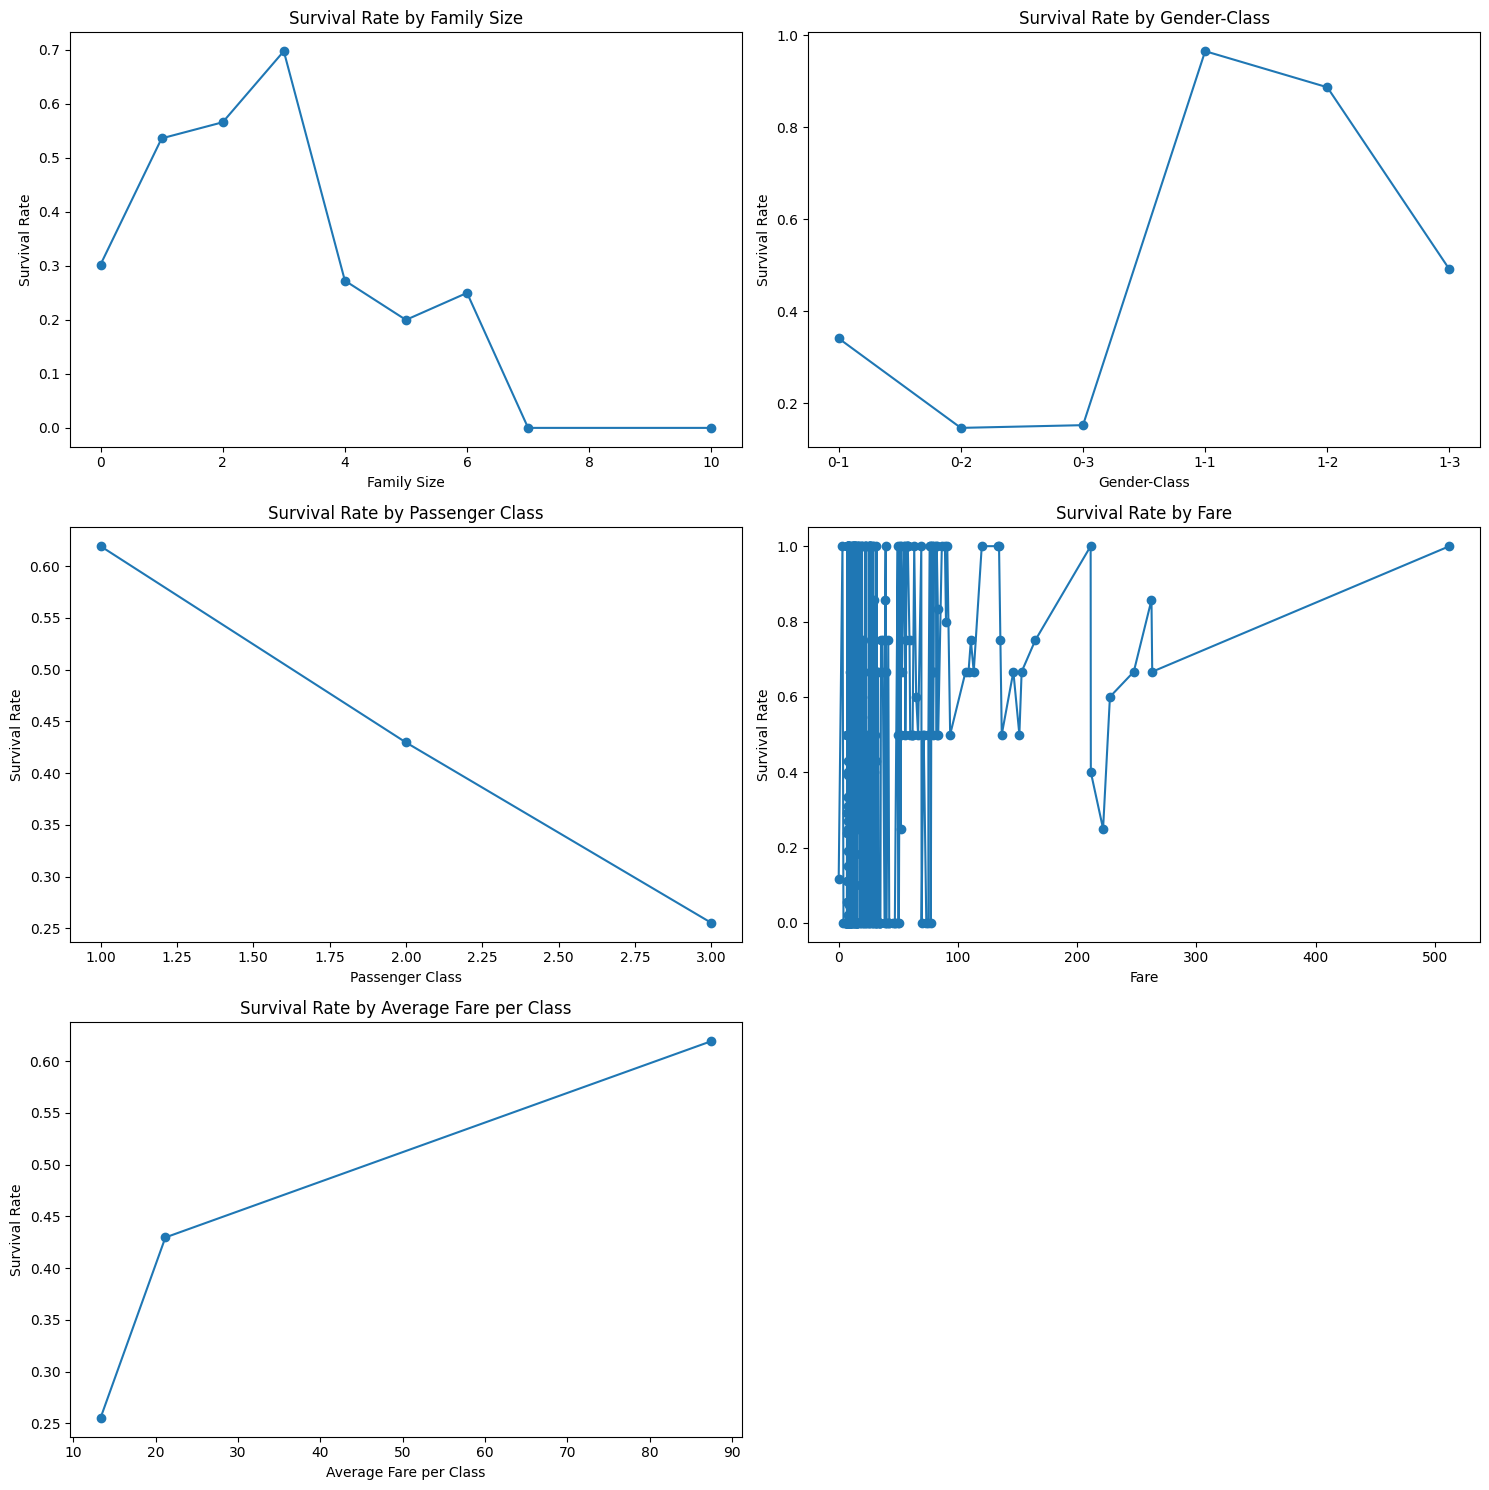

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

# sex column을 gender로 변경
df.rename(columns={'sex': 'gender'}, inplace=True)

# gender를 수치화 (female: 1, male: 0)
df['gender'] = df['gender'].map({'female': 1, 'male': 0})

# 결측치 처리 (일단은 간단히 평균값으로 대체)
#df.fillna(df.mean(), inplace=True)

# 상관관계를 볼 컬럼 선택
selected_columns = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender', 'survived']
df = df[selected_columns]

# gender와 pclass 조합 열 추가
df['gender_class'] = df['gender'].astype(str) + '-' + df['pclass'].astype(str)

# sibsp와 parch 합친 열 생성: sibsp - siblings + Spouses, parch - parents + children
df['sibsp_parch'] = df['sibsp'] + df['parch']

#### 아래 PIVOT Table로 계산이 가능하므로 의미 없음
# df["평균생존률by가족수"]=df.groupby("sibsp_parch")["survived"].transform(lambda x: x.mean())
# df["평균생존률by성별-객실"]=df.groupby("gender_class")["survived"].transform(lambda x: x.mean())
# df["평균생존율by클래스"]=df.groupby("pclass")["survived"].transform(lambda x: x.mean())
# df["평균요금by클래스"]=df.groupby("pclass")["fare"].transform(lambda x: x.mean())


df["평균요금by클래스"]=df.groupby("pclass")["fare"].transform(lambda x: x.mean())

PV1=df.pivot_table(index='sibsp_parch', values='survived', aggfunc='mean')
PV2=df.pivot_table(index='gender_class', values='survived', aggfunc='mean')
PV3=df.pivot_table(index='pclass', values='survived', aggfunc='mean')
PV4=df.pivot_table(index='fare', values='survived', aggfunc='mean')
PV5=df.pivot_table(index='평균요금by클래스', values='survived', aggfunc='mean')
# 상관관계 계산
df.drop(['gender_class'], axis=1, inplace=True)
correlations = df.corr()['survived'].drop(['survived']).sort_values(ascending=False)

print("상관관계:")
print(correlations,"\n")


print("PV1\n",PV1, "\n\nPV2\n", PV2, "\n\nPV3\n", PV3,"\n\nPV4\n", PV4,"\n")



# Subplot으로 그래프 그리기
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# PV1
axs[0, 0].plot(PV1.index, PV1['survived'], marker='o', linestyle='-')
axs[0, 0].set_title('Survival Rate by Family Size')
axs[0, 0].set_xlabel('Family Size')
axs[0, 0].set_ylabel('Survival Rate')

# PV2
axs[0, 1].plot(PV2.index, PV2['survived'], marker='o', linestyle='-')
axs[0, 1].set_title('Survival Rate by Gender-Class')
axs[0, 1].set_xlabel('Gender-Class')
axs[0, 1].set_ylabel('Survival Rate')

# PV3
axs[1, 0].plot(PV3.index, PV3['survived'], marker='o', linestyle='-')
axs[1, 0].set_title('Survival Rate by Passenger Class')
axs[1, 0].set_xlabel('Passenger Class')
axs[1, 0].set_ylabel('Survival Rate')

# PV4
axs[1, 1].plot(PV4.index, PV4['survived'], marker='o', linestyle='-')
axs[1, 1].set_title('Survival Rate by Fare')
axs[1, 1].set_xlabel('Fare')
axs[1, 1].set_ylabel('Survival Rate')

# PV5
axs[2, 0].plot(PV5.index, PV5['survived'], marker='o', linestyle='-')
axs[2, 0].set_title('Survival Rate by Average Fare per Class')
axs[2, 0].set_xlabel('Average Fare per Class')
axs[2, 0].set_ylabel('Survival Rate')

# Hide the empty subplot
fig.delaxes(axs[2,1])

plt.tight_layout()
plt.show()

In [45]:
# 데이터 가져오기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

# 문자열 변수를 숫자형으로 변환
df['sex'] = df['sex'].map({'male':0, 'female':1})

# 숫자형 변수만 선택
numeric_df = df.select_dtypes(include=[np.number])
# print(numeric_df)

# 상관계수 계산
correlation_matrix = numeric_df.corr()
# print(correlation_matrix)

# 생존 여부와의 상관계수 정렬
survival_correlation = correlation_matrix['survived'].sort_values(ascending=False)
print(survival_correlation)

survived    1.000000
sex         0.528693
fare        0.244265
parch       0.082660
sibsp      -0.027825
age        -0.055512
pclass     -0.312469
body             NaN
Name: survived, dtype: float64


상관관계 (Correlation):
parch          0.082660
sibsp_parch    0.026876
sibsp         -0.027825
Name: survived, dtype: float64 

PV1
              survived
sibsp_parch          
0            0.302532
1            0.536170
2            0.566038
3            0.697674
4            0.272727
5            0.200000
6            0.250000
7            0.000000
10           0.000000 



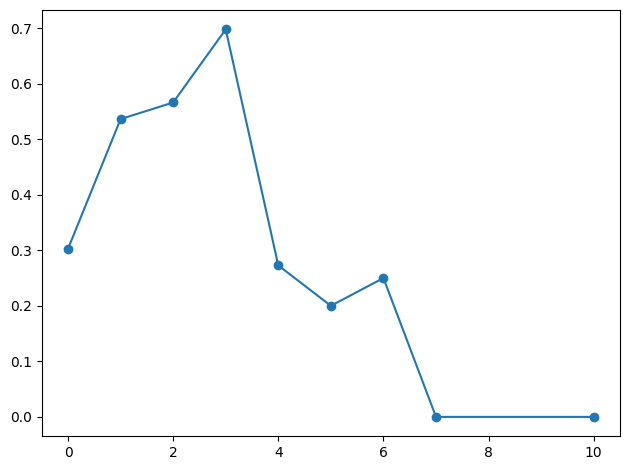

In [47]:
# Task8_0530. 승객의 가족 크기(동반한 형제자매/배우자 수와 부모/자녀 수의 합)가 생존에 영향을 미치는지를 탐색하여 결과를 출력하세요.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

# 상관관계를 볼 컬럼 선택
selected_columns = ['sibsp', 'parch', 'survived']
df = df[selected_columns]

# sibsp와 parch 합친 열 생성: sibsp - siblings + Spouses, parch - parents + children
df['sibsp_parch'] = df['sibsp'] + df['parch']

PV1=df.pivot_table(index='sibsp_parch', values='survived', aggfunc='mean')
# 상관관계 계산
correlations = df.corr()['survived'].drop(['survived']).sort_values(ascending=False)

print("상관관계 (Correlation):")
print(correlations,"\n")


print("PV1\n",PV1,"\n")

# PV1

plt.plot(PV1.index, PV1['survived'], marker='o', linestyle='-')

axs[0, 0].plot(PV1.index, PV1['survived'], marker='o', linestyle='-')
axs[0, 0].set_title('Survival Rate by Family Size')
axs[0, 0].set_xlabel('Family Size')
axs[0, 0].set_ylabel('Survival Rate')

# Hide the empty subplot
fig.delaxes(axs[0,1])

plt.tight_layout()
plt.show()



In [51]:
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

# 가족 크기 계산 (형제자매/배우자수 + 부모수)
df['family_size'] = df['sibsp'] + df['parch']

# 생존 여부와 가족 크기의 관계 탐색
survival_family_correlation = df[['family_size', 'survived']].corr().iloc[0, 1]

survival_family_correlation

0.02687643412533259

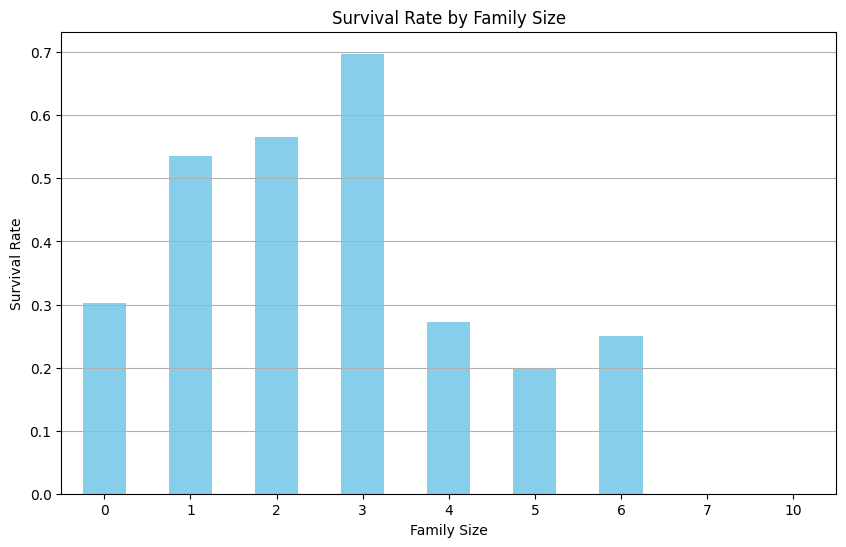

In [52]:
import matplotlib.pyplot as plt

# 가족 크기별 생존율 계산
family_survival_rate = df.groupby('family_size')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

상관관계:
평균요금by클래스    0.291875
Name: survived, dtype: float64 

           survived
평균요금by클래스          
13.302889  0.255289
21.179196  0.429603
87.508992  0.619195 



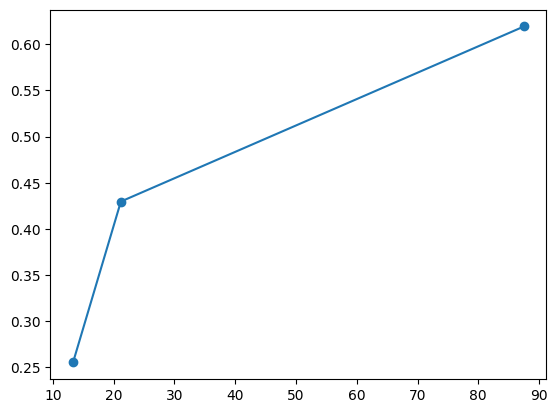

In [ ]:
# Task9_0530. 객실 등급별 평균 요금(mean_fare_by_pclass)이 생존에 미치는 영향을 분석하기 위해 mean_fare_by_pclass라는 파생 변수를 생성하여 출력하세요.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

# sex column을 gender로 변경
df.rename(columns={'sex': 'gender'}, inplace=True)

# gender를 수치화 (female: 1, male: 0)
df['gender'] = df['gender'].map({'female': 1, 'male': 0})

# 결측치 처리 (일단은 간단히 평균값으로 대체)
#df.fillna(df.mean(), inplace=True)

# gender와 pclass 조합 열 추가
df['gender_class'] = df['gender'].astype(str) + '-' + df['pclass'].astype(str)

# sibsp와 parch 합친 열 생성: sibsp - siblings + Spouses, parch - parents + children
df['sibsp_parch'] = df['sibsp'] + df['parch']


df["평균생존률by가족수"]=df.groupby("sibsp_parch")["survived"].transform(lambda x: x.mean())
df["평균생존률by성별-객실"]=df.groupby("gender_class")["survived"].transform(lambda x: x.mean())
df["평균생존율by클래스"]=df.groupby("pclass")["survived"].transform(lambda x: x.mean())
df["평균요금by클래스"]=df.groupby("pclass")["fare"].transform(lambda x: x.mean())

correlations = df[['평균요금by클래스','survived']].corr()['survived'].drop(['survived']).sort_values(ascending=False)

print("상관관계:")
print(correlations,"\n")

PV5=df.pivot_table(index='평균요금by클래스', values='survived', aggfunc='mean')
print(PV5,"\n")
plt.plot(PV5.index, PV5['survived'], marker='o', linestyle='-')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
df[['pclass','fare']].head()

# 객실 등급별 평균 요금 계산
mean_fare_by_pclass = df.groupby('pclass')['fare'].mean().to_dict()
print(mean_fare_by_pclass, '\n')

# 객실 등급별 평균 요금 파생 변수 생성
df['mean_fare_by_pclass'] = df['pclass'].map(mean_fare_by_pclass)

df[['pclass','fare','mean_fare_by_pclass']].head()

{1: 87.50899164086687, 2: 21.179196389891697, 3: 13.302888700564973} 



,pclass,fare,mean_fare_by_pclass
0,1,211.3375,87.508992
1,1,151.5500,87.508992
2,1,151.5500,87.508992
3,1,151.5500,87.508992
4,1,151.5500,87.508992


In [58]:
# mean_fare_by_pclass와 생존 여부간의 상관계수 계산
mean_fare_correlation = df[['mean_fare_by_pclass', 'survived']].corr().iloc[0, 1]

mean_fare_correlation

0.2918753351352463

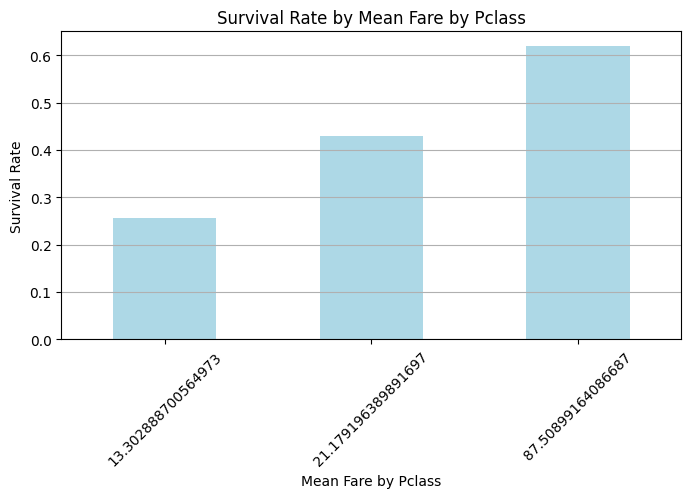

In [61]:
#생존율과 Mean Fare by Pclass 간의 막대그래프 그리기
# 생존율 계산
survival_rate_by_fare = df.groupby('mean_fare_by_pclass')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(8, 4))
survival_rate_by_fare.plot(kind='bar', color='lightblue')
plt.title('Survival Rate by Mean Fare by Pclass')
plt.xlabel('Mean Fare by Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()